# Chapter 8: When Models Meet data

本书的前半部分主要对机器学习涉及的数学基础比如线性代数， 概率统计等做了详细介绍， 后半部分将着重介绍机器学习中的四大支柱算法：

* 回归 (Regression, Chapter 9）
* 降维 ( Dimensionality reduction， Chapter 10) 
* 密度估计 (Density estimation， Chapter 11)
* 分类 (Classification ， Chapter 12) 

本章算是对前半部分和后半部分的衔接， 对机器学习的基本框架进行介绍。 

**本章主要内容**：
* Empirical risk minimization
* Parameter estimation
* Probabilistic models
* Model selection

## 8.1 Data, Models, and Learning 

机器学习的三大主要构成要素：
* 数据 
* 模型
* 学习

什么样的模型算是好模型？
* 通常好模型在 `unsee data` 上也可以表现得很好

怎么衡量模型表现？
* 准确度
* 与 `Ground Truth` 的距离
* 找到在上述标准下取得好表现的方法 （个人理解为训练是否容易， 收敛是否很快...)

### 8.1.1 Data as Vectors 

机器学习中的数据通常来说可以用表格的形式表示：
* 行代表一个 数据点 (instance)
* 列代表一个特定的特征 (feature)

通常我们会对每列数据进行 normalization， 使其平均为 0， 方差为 1。 

对与其他形式的数据，比如： 文字， 图片等， 需要领域知识并对数据先进行特征工程 (feature engineering) 来提取有效特征。 

假设本书中出现的数据都是特征工程处理过的， $x_n$ 是 $D$ 维实数向量， 向量中的每一个元素叫做： 特征(feature)，属性(attribute)， 或协变量(covariate)。 $D$用来表示特征的总个数， $d$ 用来索引特征， $d=1, 2, ..., D$。 $N$ 来表示数据集中数据点的个数， 数据点的索引用 $n=1, 2, ..., N$ 来表示。 

注：

* 有些问题中， 把列当成一个数据点处理起来可能更为方便。 

怎么从数据的向量表示中获得潜在的更好表示呢？
1. 原有特征向量的低维近似 （lower-dimensional approximations of the original feature vector)， 比如：通过PCA对原始数据进行降维
2. 更高维特征向量和原有特征向量的非线性组合 （nonlinear higher-dimensional combinations of the original feature vector。 比如：根据原始数据构建高维表示， 然后和原有特征向量进行非线性组合。 







### 8.1.2  Models as Functions

数据有了适当的向量表示形式后， 我们就可以构建模型了。 模型可以大致可以分为两种：`function` 和 `probabilistic model`， 本小节讨论前者。 

假设我们构建了如下模型：

$$f: \mathbb{R}^{D} \rightarrow \mathbb{R}$$

输入向量 $x$ 是 $D$ 维的， 函数 $f$ 返还 一个实数。 函数 $f$ 的一种特殊形式就是线性函数： $$f(x) = \theta^T x +\theta_0$$

其中 $\theta$ 和 $\theta_0$ 是未知的。 

### 8.1.3  Models as Probability Distributions

通常数据也可以被看作是一些 true underlying effect 的有噪声观测， 我们希望通过机器学习来量化这些噪声， 也就是说我们想通过构建模型来表示一些不确定性， 比如：对于一个测试数据点， 我们对其预测的值有多少置信度。 比起上面把模型当作单一的函数， 这里更倾向于用模型来描述所有可能函数的概率分布。 

### 8.1.4 Learning is Finding Parameters

学习的目的是找到好模型以及对应的参数，使预测器在 `unseen data` 上也有好的表现。 

通常机器学习算法包含3阶段
1. Prediction or inference
    * 在参数和模型固定后，在测试数据上集进行预测
    * 预测器可能是函数或者概率模型
2. Training or parameter estimation
    * 根据训练数据集，对模型进行调整
    * 此阶段的目的是找到在训练集上表现优秀的预测器， 两种策略：
        * Point estimate, 适用于预测器是函数或者概率模型的情况
        * Bayesian inference, 适用于预测器是概率模型的情况
    * 对非概率模型，采用 `empirical risk minimization` 的方法
    * 对于概率模型， 可以模拟参数的不确定性 (如果是统计模型， 可以采用 `maximum likelihood estimate` 的方法）
    * 训练通过 `numerical method` 进行， 大部分训练方法可以看作是 `hill-climbing` 方法来最大化目的函数
    * 为了模拟预测器在测试数据上的表现， 可以采用 `cross-validation`
    * 为了防止过拟合， 可以：
        * Regularization
        * adding a prior
3. Hyperparameter tuning or model selection
    

## 8.2 Empirical Risk Minimization

接下来讨论的就是如何学习的问题了， 本小节讨论当预测器是函数的情况: 运用 `empirical risk minimization` 来寻找参数。 我们按顺序回答以下四个问题：

* 8.2.1 预测器可以是怎样的函数集合呢？ 
* 8.2.2 怎么衡量预测器在训练集上的表现呢？
* 8.2.3 如何仅用训练集构造出在测试集上也表现优秀的预测器呢？
* 8.2.4 在 `space of models` 上搜索的步骤是什么？

### 8.2.1 Hypothesis Class of Functions

假设有 $N$ 个数据点 $x_n \in \mathbb{R}^D$, 每个数据点对应一个实数标签 $y_n \in \mathbb{R}$. 假设问题是监督学习的设定， 那么我们需要通过数据对 $(x_1, y_1), ..., (x_N, y_N)$ 来找到一个以$\theta$ 为参数的预测器 $f(\cdot, \theta): \mathbb{R}^D \rightarrow \mathbb{R}$。 当然， 我们需要找到好的参数 $\theta^*$ 来使我们的预测器能够很好地拟合数据：

$$f(x_n, \theta^*) \approx y_n, \forall n=1, ..., N$$

比如一般的最小二乘法回归问题中， 常用的预测器是 `affine functions`。 我们可以在原有的数据点 $x_n$ 上添加一个单位特征 $x^{(0)}$, 所以 $x_n=[1, x_n^{(1)}, x_n^{(2)}, ..., x_n^{(D)}]$， 对应的参数 $\theta = [\theta_0, \theta_1, \theta_2, ..., \theta_D]$。 那么我们的预测器可以写成如下的线性方程：

$$f(x_n, \theta) = \theta^Tx_n$$

其实就是： 

$$f(x_n, \theta) = \theta_0+ \sum_{d=1}^D\theta_dx_n^{(d)}$$

注：

* 机器学习中 `affine function` 经常被叫做 线性方程 (linear function)
* 我们也可以考虑非线性函数作为预测器 



### 8.2.2 Loss Function for Training

确定函数的类别后， 我们就可以开始考虑怎么样才能找到好的预测器了。 我们需要先定义一些标准来衡量预测器是否很好地拟合了训练数据。 

一般我们需要定义一个损失函数 (loss function) $l(y_n, \tilde y_n)$ 来衡量预测器的输出值和 `ground truth` 的差别， 即误差。 我们的目标就是找到能够最小化平均误差的好参数 $\theta^*$

比如： 我们有训练集 ${(x_1, y_1}, ..., (x_N, y_N)$, 用 $X$ 来表示输入数据矩阵 $X=[x_1, ..., x_N]^T\in \mathbb{R}^{N\times D}$, 用 $y$ 来表示标签 $y=[y_1, ..., y_N]^T \in \mathbb{R}^N$。 那么平均误差就可以用下面的式子表示：

$$R_{emp}(f,X, y)=\frac{1}{N}\sum_{n=1}^N l(y_n, \hat y_n)$$

其中 $\hat y_n = f(x_n, \theta)$。 上面的式子就叫做 `empirical risk`， 它和 预测器 $f$, 输入数据 $X$ 和 标签 $y$ 相关。 我们学习的目标就是要最小化 empirical risk, 这种策略叫 `empirical risk minimization`.

注： 

* 机器学习中， 一般假设数据 ${(x_1, y_1}, ..., (x_N, y_N)$ 是服从独立同分布的。 

在最小二乘回归中， 我们通常用平方损失函数 $l(y_n, \hat y_n) = (y_n - \hat y_n)^2$。

我们想要最小化数据的平均损失：
$$\min_{\theta\in \mathbb{R}^D} \frac{1}{N} \sum_{n=1}^N(y_n - f(x_n, \theta))^2$$

又因为 $f(x_n, \theta) = \theta^Tx_n$, 我们有：

$$\min_{\theta\in \mathbb{R}^D} \frac{1}{N} \sum_{n=1}^N(y_n - \theta^Tx_n)^2$$

写成矩阵形式有：

$$\min_{\theta\in \mathbb{R}^D} \frac{1}{N} ||(y - X\theta)||^2 $$

上述问题就是最小二成问题！ 在第九章的线性代数章节中， 我们还会在详细讨论

我们可以通过最小化 empirical loss 来帮助我们找到好的预测器， 但其实我们并不只希望我们预测器只在训练数据上有良好表现， 我们还希望他们能够在 `unseen data` 上也有良好表现。 也就是说其实我们真正想最小化的是 `expected risk`:

$$R_{true}(f) = \mathbb{E}_{x, y}[l(y, f(x))]$$

因为式子中的期望是对所有可能的 $x$ 和 $y$ 而言的， 想要准确计算 $R_{true}(f)$ 要求我们得有无限多的数据， 但这在现实中是不可能的。 所以我们需要考虑以下两个问题：

* 如何改变训练步骤使模型泛化更好呢？（泛化好是指模型不仅在训练集上表现好， 在测试集上也有良好表现）
* 如何从有限数据中预测 `expected risk` 呢？ 

下面两个子节将分别着重探讨以上两个问题。 

### 8.2.3 Regularization to Reduce Overfitting

前面我们提到过， 我们真正想得到的预测器是不仅要在训练数据集上有不错表现， 还需要在测试集上有良好表现。 如果预测器仅在训练集上有良好的表现却不能很好地拟合测试数据， 我们称这种现象为 `overfitting`。 对于一个特定的预测器， 如果在训练集上的risk $R_{emp}(f, X_{train}, y_{train})$ 低估了实际的risk $R_{true}(f)$， 那么就会产生过拟合现象。 一般来说如果数据太少或者模型太复杂的话容易造成过拟合的现象。 

所以我们需要引入一些惩罚项来防止过拟合现象， 在机器学习中， 我们称这种策略为 `regularization`。

还拿上面的最小二乘回归问题做例子的话， 我们可以在原有的目标函数中加入惩罚项(画线部分）：

$$\min_{\theta}\frac{1}{N}||y-X\theta||^2 + \underline {\lambda||\theta||^2}$$

惩罚项也被称作正则化项 （`regularization`）， $\lambda$ 也被称为正则化参数。 

为什么加入 $\lambda||\theta||^2$ 作为正则化项呢？

当过拟合现象发生时， 参数值 $\theta$ 通常会变得很大， 我们通过加入正则化项来防止参数值过于大。  

个人见解：

* 其实关于机器学习泛化性能的研究也是一个很活跃的研究领域， 通常认为模型的复杂度是影响泛化性能的复杂因素， 但是对模型复杂度的定义还没有公认的标准， 经典的定义有 VC dimension 等等。 对此领域感兴趣的话可以参考论文 [Uniform Convergence May Be Unable to Explain Generalization in Deep Learning](https://papers.nips.cc/paper/2019/file/05e97c207235d63ceb1db43c60db7bbb-Paper.pdf)

### 8.2.4 Cross-Validation to Assess the Generalization Performance 

前面提到我们根据预测器在测试集上的表现来衡量泛化误差 `generalization error`。 在用测试集检验预测器之前， 我们也可以用训练集中的一部分数据来检验预测器的表现， 这部分数据被称为 `validation set`。 但是有一个问题， 在可供训练的数据集不多的情况下， 我只能用很小一部分数据作为 validation set ， 这会使预测表现有很高的 `variance`。 解决这个问题的方法就是 `cross-validation`。 

`K-fold cross-validation` 方法把数据分成 $K$ 等份儿， $K-1$ 份儿作为训练集 $\mathcal{R}$, 剩下一份作为 validation set $\mathcal{V}$。cross-validation 方法会考虑所有可能的 $\mathcal{R}$ 和 $\mathcal{V}$。 可以参考下图（图片出自课本）： 
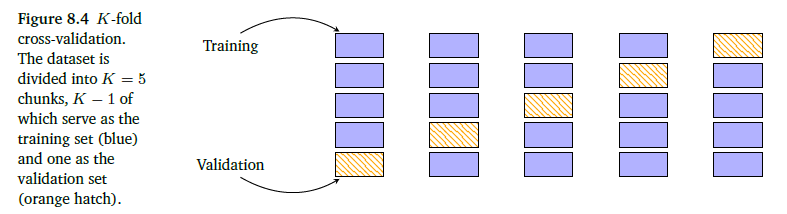

`Expected generalization error`近似（`approximate`)于下面的式子：

$$\mathbb{E}_{\mathcal{V}}[R(f, \mathcal{V}] \approx \frac{1}{K} \sum_{k=1}^K R(f^{(k)}, \mathcal{V}^{(k)})$$

这个近似（`approximate`)来源于两个方面：
* 训练数据是有限的，导致 $f^{k}$ 可能不是最好的
* validation set 是有限的， 导致对 $R(f^{(k)}, \mathcal{V}^{(k)})$ 的估计可能不是准确的

个人认为这也可以帮我们理解 `Probably approximately correct learning` 的概念。 

K-fold cross-validation 的一个缺点是我们得多次训练， 但是 cross-validation 是易并行问题，在计算资源充足的情况下， 花费的时间也不会太多。  

## 8.3 Parameter Estimation

本小节主要探讨如何使用概率分布来模拟 observation process 和 我们预测器参数的不确定性。 

### 8.3.1 Maximum Likelihood Estimation

最大似然估计的基本思想就是最大化似然函数（和模型参数有关）， 能够使似然函数最大化的参数所对应的模型， 就是能够很好地拟合数据的模型。 似然函数有以下形式： $$p(x|\theta)$$

与概率函数不同的是， 似然函数中 $x$ 是固定的， $\theta$ 是变化的。 

在最大似然估计中， 我们一般考虑似然函数的 `negative logrithm` 形式， 即 `negative log-likelihood`:

$$\mathcal{L}_x(\theta) = - \log p(x|\theta)$$

因为 negative log-likelihood 中 $x$ 是固定的， 我们一般写成 $\mathcal{L}(\theta)$ 的形式。  $\mathcal{L}(\theta)$ 的意义是：对于观测值 $x$，模型参数是 $\theta$ 的可能性有多少呢？ 

举一个简单的例子： 抛一枚硬币，正面朝上的概率是 $\theta$, 背面朝上的概率是 $1-\theta$。 假设我们连续抛了20次， 得到的结果都是背面朝上。 那么我们可以得到似然函数： $L = \theta^0(1-\theta)^{20}$。 如果 $\theta = 1, L=0$, 也就是说如果 $\theta=1$ 的情况下， 我们观测到连续20次背面朝上的可能性是0。 如果 $\theta=0.5, L = (0.5)^20$, 也是一个很小的数， 因为 $\theta=0.5$ 的情况下， 我们连续20次观测到背面朝上的可能性也是很小的。最可能的情况是 $\theta=0， L= 1$, 这才是对我们观测到数据的最好解释。  

再来总结下 概率函数 v.s. 似然函数： $p(x|\theta)$
* 概率函数： $\theta$ 固定， 表示的是在模型的参数是$\theta$ 的情况下，观测到 $x$的概率分布
* 似然函数： $x$ 固定， 表示的是在观测到 $x$ 的情况下， 模型参数是 $\theta$ 的可能性是多少

假设在监督学习的设定下， 我们有训练集 $(x_1, y_1), ..., (x_N, y_N)$, 其中 $x_n\in \mathbb{R}^D$， $y_n\in \mathbb{R}$。 我们想要构建一个预测器以特征向量 $x_n$ 为输入， 输出 $y_n$（或近似 $y_n$)。即给定 $x_n$的情况下， 我们想要 $y_n$ 的概率分布。 假设我们通过高斯分布 （$\epsilon_n \sim \mathcal{N}(0, \sigma^2)$， 来解释 `observation uncertainty`。并且我们的模型是线性模型 $x_n^T\theta$。 也就是说对于每个数据对 $(x_n, y_n)$， 我们有：

$$p(y_n|x_n, \theta) = \mathcal{N}(y_n|x_n^T\theta, \sigma^2)$$

前面提到过在机器学习中， 一般假设数据 $(x_1, y_1), ..., (x_N, y_N)$ 是服从独立同分布的。所以我们可以把在整个数据集 $(\mathcal{Y} = {y_1, ..., y_N}, \mathcal{X} = {x_1, x_2, ..., x_N})$ 上的 `likelihood` 分解为在每个数据点上的 `likelihood` 的乘积：

$$p(\mathcal{Y} | \mathcal{X}, \theta) = \prod_{n=1}^N p(y_n|x_n, \theta)$$

写出它的 `negative logrithm` 形式， 我们有：
$$\mathcal{L}(\theta) = -\log p(\mathcal{Y} | \mathcal{X}, \theta) = -\sum_{n=1}^N \log p(y_n|x_n, \theta)$$

像之前谈到的那样，`negative log-likelihood` $\mathcal{L}(\theta)$ 是关于 $\theta$ 的函数。 我们需要最小化它， 来找到能很好地解释数据集的参数$\theta$。 

继续我们的例子， 根据高斯分布的概率函数公式， 我们可以对 $\mathcal{L}(\theta)$ 进行展开：

$$\begin{aligned} \mathcal{L}(\theta) &=-\sum_{n=1}^{N} \log p\left(y_{n} \mid x_{n}, \theta\right)=-\sum_{n=1}^{N} \log \mathcal{N}\left(y_{n} \mid x_{n}^{\top} \theta, \sigma^{2}\right) \\ &=-\sum_{n=1}^{N} \log \frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp \left(-\frac{\left(y_{n}-x_{n}^{\top} \theta\right)^{2}}{2 \sigma^{2}}\right) \\ &=-\sum_{n=1}^{N} \log \exp \left(-\frac{\left(y_{n}-x_{n}^{\top} \theta\right)^{2}}{2 \sigma^{2}}\right)-\sum_{n=1}^{N} \log \frac{1}{\sqrt{2 \pi \sigma^{2}}} \\ &=\frac{1}{2 \sigma^{2}} \sum_{n=1}^{N}\left(y_{n}-x_{n}^{\top} \theta\right)^{2}- \underline{\sum_{n=1}^{N} \log \frac{1}{\sqrt{2 \pi \sigma^{2}}}} \end{aligned}$$

如果 $\sigma$ 是给定的话， 划线部分是常数， 最小化 $\mathcal{L}(\theta)$ 的问题等同于解决最小二乘问题。 

注：
* 如果似然函数不是高斯分布函数的话， 最大似然估计可能没有 `closed-form analytic solution`。 

### 8.3.2 Maximum A Posteriori Estimation

本子节用贝叶斯的角度来估计参数 $\theta$。 比如上面抛硬币的问题， 我们得到的结论是硬币正面朝上的概率为 0。 当时一般我们认为一个均匀硬币正面朝上的概率是 0.5， 也就是说我们对 $\theta$ 的分布有一些先验知识 (`prior knowledge`), 比如 $p\sim \mathcal{N}(0.5, 1)$。 

如果我们对 $\theta$ 的分布有一些先验知识， 我们可以在 `likelihood` 上乘以一个追加项： $p(\theta)$, 就是 $\theta$ 的先验概率分布。 也就是说在给定 $\theta$ 先验概率的情况下， 我们根据观测到的数据 $x$， 来对参数 $\theta$ 的分布进行更新。 根据贝叶斯定理， 我们有：

$$p(\theta|x) = \frac{p(x|\theta)p(\theta)}{p(x)}$$

前面我们是想要最大化似然函数 $p(x|\theta)$， 现在我们想要最大化后验概率 (`posterior`): $p(\theta|x)$。 又因为上面式子的分母跟 $\theta$ 毫无关系， 我们可以不考虑， 所以只用最大化 $p(x|\theta)p(\theta)$ 就行了， 准确地说是最小化 `negative log-posterior`， 我们称这种方法为 `Maximum a posteriori estimation (MAP estimation)`。 

注：
* 当 $p(\theta)$ 是均匀分布（即 $p(\theta)$ 是个常数时）， MAP estimation 就变成了 MLE。 也就是说其实 MLE 是 MAP estimation 的一种特殊形式。
* MLE 和 MAP estimation 都是对参数 $\theta$ 的 point estimation。
* [参考资料](https://blog.csdn.net/u011508640/article/details/72815981?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-4.control&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-4.control)

## 8.3.3 Model Fitting

本子节重点理解几个概念就可以了：
* model class： 就是参数所能确定的所有模型的集合。 比如： $y=ax+b, \theta={a, b}$, 不同的 $\theta$ 代表不同的模型，$\theta$ 所能代表的所有模型的集合就是 model class
* Overfitting: 模型能力过强大， 粗暴地拟合了训练集， 但如果训练集噪声很大的话， 相当于我们完美地学习了一个“错误”模型， 那就不可能在测试集上有很好表现了。 （model class is too rich）
* Underfitting: 模型不够强大， 不可能拟合训练集， 更别说测试集了。 比如说： 一个线性函数， 不管怎么调整参数， 都不可能拟合一个非线性函数。 （model class is not rich）

借用书上的图说下自己的理解：

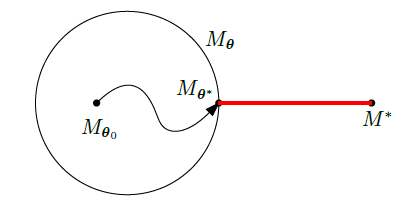

上图中， 整个圆代表的是 $M_{\theta}$ model class，； $M^*$ 是数据的出处（未知的）， 也就是我们学习的目标模型； $M_{\theta_0}$ 是我们开始学习时的模型（初始化）；圆内曲线代表的是 （优化过程，学习过程）； $M_{\theta^*}$, 是我们能学到的最好模型，可以看出还是与真正的目标模型 $M^*$ 有一定的距离。

个人理解：
* 圆的大小 （$M_{\theta}$ model class 的大小），甚至是否能将 $M^*$ 包括在内取决于数据的多少， 数据的质量好坏，以及我们对参数的设定（其实就是对模型type的选择， 是线性模型，还是非线性模型， 参数的多少等等）
* 而如何圆内的初始模型 $M_{\theta_0}$ 到 $M_{\theta^*}$ 就是优化的问题了。 
* 如果圆能将 $M^*$ 包括在内， 而且优化算法能从 $M_{\theta_0}$ 找到 $M^*$， 这就是最理想的情况了
* 但是实际情况下因为数据的有限性和数据可能包含噪声， 以及我们对模型类别选择的不合理等， 都会造成我们不可能学习到 $M^*$

## 8.4 Probabilistic Modeling and Inference

在机器学习中， 我们常常对数据的解释和分析比较关心（比如：预测未来事件和做决策）， 因此我们经常构建模型来描述数据的生成过程（generative process）。 

比如我们可以把抛硬币实验分成两步：
1. 定义参数 $\mu$, 表示正面朝上的概率
2. 从伯努利分布 $P(x|\mu) = Ber(\mu)$ 中采样， $x\in\{正面， 反面\}$

这样我们就可以得到数据集 $\mathcal{X}$， 因为 $\mu$ 是未知的， 我们只能通过数据集 $\mathcal{X}$ 来学习 $\mu$。 本小节主要讨论用概率建模实现这个目的。 

### 8.4.1 Probabilistic Models

概率模型把对实验的不确定性体现称概率分布。 在概率建模中最重要的要素就是观测值 $x$ 和未知参数 $\theta$ 的联合概率分布， 它包含以下信息：
* 先验概率 $p(\theta)$, 似然函数 $p(x|\theta)$ （因为 $p(x, \theta) = p(x|\theta) p(\theta)$）
* Marginal likelihood p(x)， 可以在联合分布的基础上对参数 $\theta$ 积分
* 后验概率 $p(\theta|x) = \frac{p(x|\theta)p(\theta)}{p(x)}$

### 8.4.2 Bayesian Inference

前面讨论的 MLE 和 MAP estimation 都是 点估计方法（`point estimation`）。 通过解决一个优化问题，我们找到了一个优秀的 $\theta^*$, 然后我们可以用得到的 $\theta^*$ 进行预测：$p(x|\theta^*)$。 

但是只考虑后验概率分布的单个统计量（比如我们前面讨论过的能够使后验概率最大的 $\theta^*$）可能会造成信息损失, 所以在某些情况下得到完整的后验分布也是很有必要的。 贝叶斯推论 (`Baysesian Inference`) 就是一种根据数据 $\mathcal{X}$ 和参数的先验概率 $p(\theta)$， 学习参数后验概率的方法：
$$p(\theta \mid \mathcal{X})=\frac{p(\mathcal{X} \mid \theta) p(\theta)}{p(\mathcal{X})}, \quad p(\mathcal{X})=\int p(\mathcal{X} \mid \theta) p(\theta) \mathrm{d} \theta$$

注：
*  $p(\theta)$, $p(\mathcal{X} \mid \theta)$ 是给定的

如果得到了参数的后验概率分布， 我们可以把对参数的不确定性转移到数据上， 因此有：

$$\quad p(x)=\int p(x \mid \theta) p(\theta) \mathrm{d} \theta = \mathbb{E}_{\theta}[p(x \mid \theta)]$$

下面比较下 8.3 小节讨论的 parameter estimation 和 这小节讨论的 Bayesian inference：
* parameter estimation
    * MLE 和 MAP estimation 最终会得到参数的点估计 $\theta^*$
    * 主要要解决的计算问题是优化问题
    * 预测时很直接， $p(x|\theta^*)$
* 贝叶斯推论
    * 得到的会是参数的后验概率
    * 主要要解决的计算问题是积分
    * 预测时还要解决另一个积分问题，$\quad p(x)=\int p(x \mid \theta) p(\theta) \mathrm{d} \theta = \mathbb{E}_{\theta}[p(x \mid \theta)]$

### 8.4.3 Latent-Variable Models

在实际中，有时我们会加入一些潜在变量 （`latent variable`） $z$ 来作为模型的一部分， 比如：PCA 降维时， 密度估计时等等

潜在变量特点：
* 不像参数 $\theta$ 那样会直接地对模型参数化
* 它的作用是描述数据生成过程， 帮助我们更好地解释模型
* 可以简化模型结构， 帮助我们定义更简单更丰富的模型结构

假设用 $x$ 表示数据, $\theta$ 表示模型参数，$z$ 表示潜在变量， 我们通过以下条件概率分布来生成数据：

$$p(x \mid z, \theta)$$

我们可以对 $z$ 积分， 得到似然函数：

$$p(x \mid \theta)=\int p(x \mid z, \theta) p(z) \mathrm{d} z$$

上式中 $p(z)$ 是潜在变量 $z$ 的先验概率。 

我们就可以根据似然函数， 我们就可以通过 MLE 或 MAP（需要 $\theta$ 的先验概率）对参数进行估计了。 

我们也可以根据下式得到参数的后验概率：

$$p(\theta \mid \mathcal{X})=\frac{p(\mathcal{X} \mid \theta) p(\theta)}{p(\mathcal{X})}$$

注：
* Latent-variable model 的一个难题就是 $p(\mathcal{X} \mid \theta)$ 需要对 $z$ 积分

我们也可以计算潜在变量的后验概率：

$$p(z \mid \mathcal{X})=\frac{p(\mathcal{X} \mid z) p(z)}{p(\mathcal{X})}, \quad p(\mathcal{X} \mid z)=\int p(\mathcal{X} \mid z, \theta) p(\theta) \mathrm{d} \theta$$

但不管是对潜在变量积分还是对模型参数积分， 都很让人头疼， 下面是求潜在变量的后验概率时比较简单的方法：

$$p(\boldsymbol{z} \mid \mathcal{X}, \boldsymbol{\theta})=\frac{p(\mathcal{X} \mid \boldsymbol{z}, \boldsymbol{\theta}) p(\boldsymbol{z})}{p(\mathcal{X} \mid \boldsymbol{\theta})}$$

## 8.5 Directed Graphical Models

本小节主要介绍如何用图来表示概率模型。 在上一小节我们提到过联合概率分布是我们研究概率建模时非常重要的要素， 因为它包括了先验概率， 似然函数和后验概率的信息。 但是联合分布可能十分复杂，而且并不能提供任何有关概率模型结构的信息， 所以本小节引入图， 来更清楚地表示概率模型。 



### 8.5.1 Graph Semantics

有向图模型/贝叶斯网络时表示概率模型中 `conditional dependency` 的方法。

根据因式分解过的联合分布画出其对应的有向图模型的步骤：
1. 画出所有随机变量所对应的节点
2. 每一个 `conditional distribution`, 添加有向箭头， 箭头起始于被 `conditioned` 的节点。 

比如，$p(a, b, c) = p(c\mid a, b)p(b\mid a)p(a)$ 所对应的有向图模型如下：

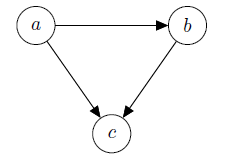

有向图的布局依赖于联合分布概率所分解出来的因式。 

如何根据有向图得到联合分布呢？

$$p(x) = p(x_1, ..., x_K) = \prod_{k=1}^K p(x_k|Pa_k)$$

其中 $Pa_k$ 指的是 “$x_k$ 的 父节点”， 即所有指向 $x_k$ 的箭头的起始点。 

例子：

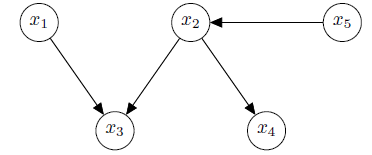

从上图我们可以得到的联合分布式为：

$$p\left(x_{1}, x_{2}, x_{3}, x_{4}, x_{5}\right)=p\left(x_{1}\right) p\left(x_{5}\right) p\left(x_{2} \mid x_{5}\right) p\left(x_{3} \mid x_{1}, x_{2}\right) p\left(x_{4} \mid x_{2}\right)$$

### 8.5.2 Conditional Independence and d-Separation

假设有一有向图， $\mathcal{A}, \mathcal{B}, \mathcal{C}$ 是图中任意三个 `nonintersecting` 节点集合。 我们想要探讨 $\mathcal{A} \perp  \mathcal{B} \mid \mathcal{C}$，即在给定 $\mathcal{C}$的情况下， $\mathcal{A}$ 条件独立于 $\mathcal{B}$ 在有向非循环图中是否成立。 

我们考虑由 $\mathcal{A}$ 通往 $\mathcal{B} $ 的所有可能的 trail（不考虑方向的 path ）。 如果 path中 有任何节点满足下列两个条件就说该 path 被阻塞了：
* path上的箭头在某个节点上头碰尾或尾碰尾， 并且这个节点在 $\mathcal{C}$ 中
* 在某个节点上头碰头， 而且这个节点以及其子节点不属于 $\mathcal{C}$

如果所有的path 都被阻塞了， 我们称 $\mathcal{A}$  从  $\mathcal{B}$ 中 被 $\mathcal{C}$ `d-separated` 了。 那么图中所有变量的联合分布满足 $\mathcal{A} \perp  \mathcal{B} \mid \mathcal{C}$。 

书上有个例题：

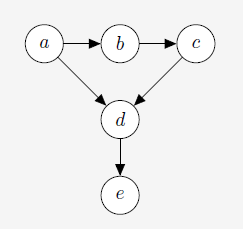

答案如下：

$$
\begin{array}{l}
b \perp d \mid a, c \\
a \perp c \mid b \\
b \not \perp d \mid c \\
a \not \perp c \mid b, e
\end{array}
$$

个人理解是：

* $b \perp d \mid a, c $ 中 $\mathcal{A}$ = {$b$}， $\mathcal{B}$ = {$d$}, $\mathcal{C}$ = {$a, c$}。 从 $b$ 到 $d$ 有两条 trail,trail 1 $b -a- d$ 其中包含两个箭头 $a \rightarrow b, a\rightarrow d$ 尾尾相连于 $a$，而 $a \in \mathcal{C}$, 所以此 path 被阻塞。同理 trail 2 $b-c-d$的path也被阻塞 (头尾相连)。 因此 $b \perp d \mid a, c $

* $a \perp c \mid b $ 中 $\mathcal{A}$ = {$a$}， $\mathcal{B}$ = {$c$}, $\mathcal{C}$ = {$b$}。 从 $a$ 到 $c$ 有两条 trail,trail 1: $a- b- c$ 其中包含两个箭头 $a \rightarrow b, b\rightarrow c$ 头尾相连于 $b$，而 $b \in \mathcal{C}$, 所以此 path 被阻塞。同理 trail 2: $a-d-b$的path也被阻塞 (头头相连于 $d$, $d \not\in \mathcal{C}$)。 因此 $a \perp c \mid b $。 

* $b \not \perp d \mid c$ 中 $\mathcal{A}$ = {$b$}， $\mathcal{B}$ = {$d$}, $\mathcal{C}$ = {$c$}。 从 $b$ 到 $d$ 有两条 trail,trail 1 $b -a- d$ 其中包含两个箭头 $a \rightarrow b, a\rightarrow d$ 尾尾相连于 $a$，而 $a \not\in \mathcal{C}$, 所以此 path 没有被阻塞。 因此 $b \not\perp d \mid c$
* 略 

## 8.6 Model Selection

`Model selection` 主要是为了保证模型在 `unseen test data` 上也可以表现得很好。 本小节介绍几种机制。 

### 8.6.1 Nested Cross-Validation

用书上的图说明：

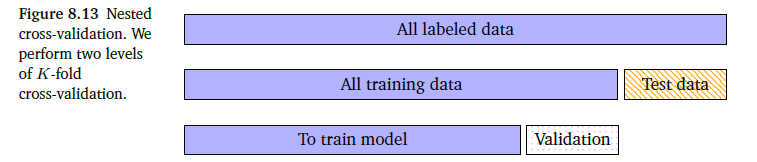

在前面介绍 K-fold cross-validation 的时候， 我们当时是把所有数据分成 $K$ 等份儿， 然后取一份儿做 validation set 来预测我们模型的泛化误差是多少。 为了保证我们选出的模型是我们能学习出的最好模型， 我们在原有剩下的训练数据集上， 再分出一部分做 validation set， 来比较模型泛化的好坏， 然后选出泛化最好的模型， 再在之前的 validation set (为了与之前的区分，通常被称为 test set)上来最终检验模型的泛化误差。 


### 8.6.2 Bayesian Model Selection

通常来说， 模型选择机制都是在模型复杂度和数据拟合之间做平衡： 太复杂的模型，拟合数据很好，但却很容易过拟合； 太简单的模型， 不会过拟合， 但是在训练数据上也表现不好。 我们想要找到的是能很好拟合数据的模型中最简单的那个。 这种概念又称作奥卡姆剪刀。 

个人理解：
* 奥卡姆剪刀背后的思想就是杀鸡焉用牛刀！ 能用简单的模型解决问题， 就不要选择更复杂的模型了 

书中有个图：

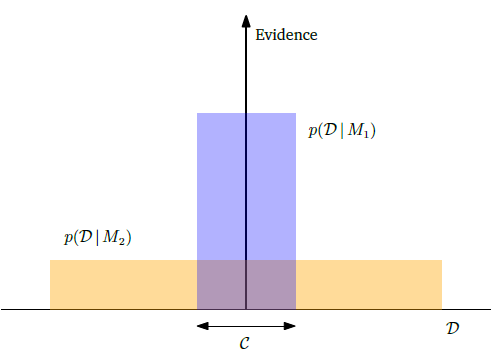

横轴代表可能的数据集 $\mathcal{D}$, 我们想要模型 $M_i$ 的后验概率 $p(M_i \mid \mathcal{D})$。 模型 $M_i$ 对数据的预测 $p(\mathcal{D} \mid M_i)$， 又称为 模型 $M_i$ 的 `evidence`。 假设模型的先验分布是均匀分布。 模型 $M_1$ 比较简单， 只能预测出一小部分的数据集 （区域$\mathcal{C}$）； 模型 $M_2$ 比较复杂， 能够预测出更多的数据集。 但是对于区域 $\mathcal{C}$ 内的数据集， $M_1$ 表现得更好。

前面我们提到过， 模型应该能够解释数据， 即对于给定的模型我们应该能够从中生成数据。 而且， 如果模型在给定的数据下学习地很好的话， 从学习好的模型生成的数据应该跟给定的数据具有很高的相似性。 基于这一点， 我们可以把模型选择看作一个 `hierarchical inference problem`。 

假设我们有有限个模型 $M = {M_1, ..., M_k}$， 每个模型 $M_k$ 的参数是 $\theta_k$。 在贝叶斯模型选择种， 我们为模型集合 $M$ 赋予一个先验分布 $p(M)$。 那我们可以写出模型 $M_k$ 对应的生成数据的过程：

$$\begin{aligned} M_{k} & \sim p(M) \\ \theta_{k} & \sim p\left(\theta \mid M_{k}\right) \\ \mathcal{D} & \sim p\left(\mathcal{D} \mid \theta_{k}\right) \end{aligned}$$

给定训练集 $\mathcal{D}$, 根据贝叶斯定理， 我们可得到模型 $M_k$ 的后验分布：

$$p\left(M_{k} \mid \mathcal{D}\right) \propto p\left(M_{k}\right) p\left(\mathcal{D} \mid M_{k}\right)$$

可以看出后验概率不再跟 $\theta_k$ 有关, 因为我们已经把 $\theta_k$ 积分了出去， 见下式（又叫 model evidence 或 marginal likelihood）:
$$p\left(\mathcal{D} \mid M_{k}\right)=\int p\left(\mathcal{D} \mid \theta_{k}\right) p\left(\theta_{k} \mid M_{k}\right) d \theta_{k}$$

我们可以用 MAP estimate 来选择模型：

$$M^* = \arg \max_{M_k} p(M_k\mid \mathcal{D})$$

需要注意的是其实我们本来是想最大化 model evidence 的， 但如果模型的先验分布是均匀分布, $p(M_k) = \frac{1}{K}$, 那么问题就转化为了上式。

注：
* 在计算 marginal likelihood 的时候如需要引入积分

### 8.6.3 Bayes Factors for Model Comparison

假设给定数据集 $\mathcal{D}$, 我们想要比较两个模型 $M_1, M_2$。 如果我们求出后验概率 $p(M_1\mid \mathcal{D})$ 和 $p(M_2\mid \mathcal{D})$， 我们可以比较后验概率的比值：

$$\underbrace{\frac{p\left(M_{1} \mid \mathcal{D}\right)}{p\left(M_{2} \mid \mathcal{D}\right)}}_{\text {posterior odds }}=\frac{\frac{p\left(\mathcal{D} \mid M_{1}\right) p\left(M_{1}\right)}{p(\mathcal{D})}}{\frac{p\left(\mathcal{D} \mid M_{2}\right) p\left(M_{2}\right)}{p(\mathcal{D})}}=\underbrace{\frac{p\left(M_{1}\right)}{p\left(M_{2}\right)}}_{\text {prior odds }} \underbrace{\frac{p\left(\mathcal{D} \mid M_{1}\right)}{p\left(\mathcal{D} \mid M_{2}\right)}}_{\text {Bayes factor }}$$

如果模型的先验概率是均匀分布， 那么 prior odds 为1， 所以只剩 $\frac{p\left(\mathcal{D} \mid M_{1}\right)}{p\left(\mathcal{D} \mid M_{2}\right)}$。 如果 Bayes factor 大于1， 我们选择 $M_1$, 否则我们选择 $M_2$

个人理解：
* 不管是利用 Bayes factors（其实也是用了后验概率） 也好， 还是上面子节利用后验概率也好，核心思想都是：如果模型在数据集 $\mathcal{D}$ 上学习地很好的话， 那么通过学习到的模型生成的数据应该跟 $\mathcal{D}$ 有很大相似性， 所以 $ p\left(\mathcal{D} \mid M_{k}\right) $ 越高越好。 